In [66]:
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib

from pathlib import Path

In [110]:
matplotlib.rcParams['figure.figsize'] = (12,7) # Til rapport
#matplotlib.rcParams['figure.figsize'] = (20,10) # Til undervejs

In [3]:
%store -r v_accuracies_single
%store -r t_accuracies_single
%store -r steps_cum

In [13]:
print(len(v_accuracies_single))
print(len(steps_cum))

280
280


In [9]:
%store -r rel_accs_v_multi
%store -r rel_accs_t_multi
%store -r abs_accs_v_multi
%store -r abs_accs_t_multi
%store -r acc_struct_v_multi
%store -r acc_struct_t_multi

In [10]:
print(len(acc_struct_v_multi))

280


In [7]:
%store -r solv_rel_accs_v  
%store -r solv_rel_accs_t  
%store -r solv_abs_accs_v  
%store -r solv_abs_accs_t

In [8]:
print(len(solv_rel_accs_v))

280


In [11]:
%store -r epochs
print(len(epochs))

0


In [15]:
#Kør kun dette hvis du har glemt at gemme epochs
epochs = np.arange(0,steps_cum[-1],int(steps_cum[-1]/20))
print(epochs)

[    0  1355  2710  4065  5420  6775  8130  9485 10840 12195 13550 14905
 16260 17615 18970 20325 21680 23035 24390 25745 27100]


In [54]:
best_multi_test_index = np.argmax(acc_struct_v_multi)
best_single_test_index = np.argmax(t_accuracies_single)
best_multi_test = acc_struct_v_multi[best_multi_test_index]
best_single_test = t_accuracies_single[best_single_test_index]
best_multi_test_step = steps_cum[best_multi_test_index]
best_single_test_step = steps_cum[best_single_test_index]
peaksx = [best_multi_test_step, best_single_test_step]
peaksy = [best_multi_test, best_single_test]
peaksc = ['b','r']

In [104]:
singlevals_t = t_accuracies_single
multivals_t = acc_struct_t_multi

singlevals_v = v_accuracies_single
multivals_v = acc_struct_v_multi


ss_best_multi_test_index   = np.argmax(multivals_t)
ss_best_single_test_index  = np.argmax(singlevals_t)
ss_best_multi_test         = multivals_t[ss_best_multi_test_index]
ss_best_single_test        = singlevals_t[ss_best_single_test_index]
ss_best_multi_test_step    = steps_cum[ss_best_multi_test_index]
ss_best_single_test_step   = steps_cum[ss_best_single_test_index]
ss_best_multi_test_epoch   = int(ss_best_multi_test_step/1355)
ss_best_single_test_epoch  = int(ss_best_single_test_step/1355)

ss_best_multi_valid_index   = np.argmax(multivals_v)
ss_best_single_valid_index  = np.argmax(singlevals_v)
ss_best_multi_valid         = multivals_v[ss_best_multi_valid_index]
ss_best_single_valid        = singlevals_v[ss_best_single_valid_index]
ss_best_multi_valid_step    = steps_cum[ss_best_multi_valid_index]
ss_best_single_valid_step   = steps_cum[ss_best_single_valid_index]
ss_best_multi_valid_epoch   = int(ss_best_multi_valid_step/1355)
ss_best_single_valid_epoch  = int(ss_best_single_valid_step/1355)

ss_peaksx = [ss_best_multi_test_step, ss_best_single_test_step]
ss_peaksy = [ss_best_multi_test, ss_best_single_test]

print('\t\tSingle\t\t\tMulti\n(Epoch\tValid)\t(Epoch\tTest)\t(Epoch\tValid)\t(Epoch\tTest)')
print('(%d\t%.4f)\t(%d\t%.4f)\t(%d\t%.4f)\t(%d\t%.4f)' % (ss_best_single_valid_epoch, ss_best_single_valid, ss_best_single_test_epoch, ss_best_single_test, ss_best_multi_valid_epoch, ss_best_multi_valid, ss_best_multi_test_epoch, ss_best_multi_test))
#print('%d\t%.4f\t%.4f' % (int()))

		Single			Multi
(Epoch	Valid)	(Epoch	Test)	(Epoch	Valid)	(Epoch	Test)
(17	0.7141)	(19	0.7124)	(12	0.7156)	(11	0.7157)


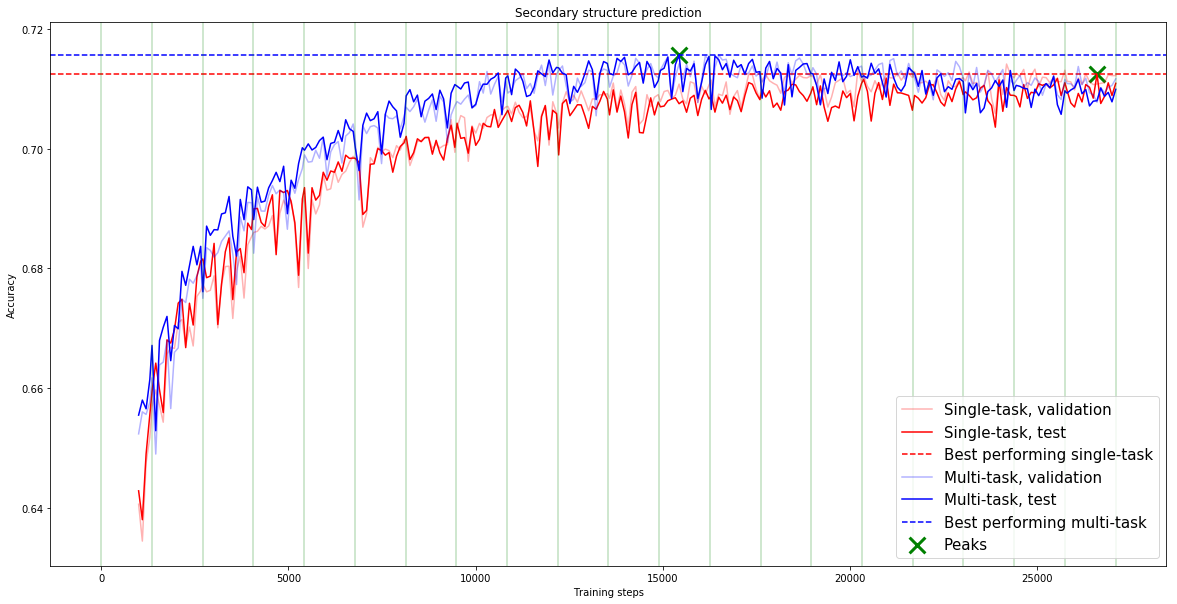

In [105]:
savefile = 0
filename = '../graphs/new/final_abs_small.png'
prefix = 'Kernel sizes: '

offset = 10

LW=2
plt.plot(steps_cum[offset:], v_accuracies_single[offset:], label='Single-task, validation', c='r', alpha=0.3)#, lw=LW)
plt.plot(steps_cum[offset:], t_accuracies_single[offset:], label='Single-task, test', c='r', alpha=1)#, lw=LW)
plt.axhline(y=best_single_test, label='Best performing single-task', ls='--', c='r')

plt.plot(steps_cum[offset:], acc_struct_v_multi[offset:], label='Multi-task, validation', c='b', alpha=0.3)#, lw=LW)
plt.plot(steps_cum[offset:], acc_struct_t_multi[offset:], label='Multi-task, test', c='b', alpha=1)#, lw=LW)
plt.axhline(y=best_multi_test, label='Best performing multi-task', ls='--', c='b')
#plt.plot(steps_cum[3:], acc_structs4[3:], label=())#, lw=LW)
#plt.plot(steps_cum[3:], acc_structs6[3:], label=('%s %s' % (prefix, '')))#, lw=LW)
#plt.plot(steps_cum[3:], acc_structs7[3:], label=('%s %s' % (prefix, '')))#, lw=LW)


for i in epochs:
    plt.axvline(x=i, alpha=0.25, c='g')
    

plt.scatter(ss_peaksx, ss_peaksy, c='green', marker='x', s=250, lw=3, label='Peaks')


plt.title('Secondary structure prediction')
plt.xlabel('Training steps')
plt.ylabel('Accuracy')
plt.legend(prop={'size': 15})
#plt.show()
if savefile:
    my_file = Path(filename)
    if my_file.is_file():
        print('Filen findes allerede')
    else:
        print('Gemmer som:', filename)
        plt.savefig(filename)

#plt.savefig('../graphs/new/kernel_size_variations_1.png')

In [106]:
singlevals_t = solv_rel_accs_t
multivals_t = rel_accs_t_multi

singlevals_v = solv_rel_accs_v
multivals_v = rel_accs_v_multi


rel_best_multi_test_index   = np.argmax(multivals_t)
rel_best_single_test_index  = np.argmax(singlevals_t)
rel_best_multi_test         = multivals_t[rel_best_multi_test_index]
rel_best_single_test        = singlevals_t[rel_best_single_test_index]
rel_best_multi_test_step    = steps_cum[rel_best_multi_test_index]
rel_best_single_test_step   = steps_cum[rel_best_single_test_index]
rel_best_multi_test_epoch   = int(rel_best_multi_test_step/1355)
rel_best_single_test_epoch  = int(rel_best_single_test_step/1355)

rel_best_multi_valid_index   = np.argmax(multivals_v)
rel_best_single_valid_index  = np.argmax(singlevals_v)
rel_best_multi_valid         = multivals_v[rel_best_multi_valid_index]
rel_best_single_valid        = singlevals_v[rel_best_single_valid_index]
rel_best_multi_valid_step    = steps_cum[rel_best_multi_valid_index]
rel_best_single_valid_step   = steps_cum[rel_best_single_valid_index]
rel_best_multi_valid_epoch   = int(rel_best_multi_valid_step/1355)
rel_best_single_valid_epoch  = int(rel_best_single_valid_step/1355)

rel_peaksx = [rel_best_multi_test_step, rel_best_single_test_step]
rel_peaksy = [rel_best_multi_test, rel_best_single_test]

print('\t\tSingle\t\t\tMulti\n(Epoch\tValid)\t(Epoch\tTest)\t(Epoch\tValid)\t(Epoch\tTest)')
print('(%d\t%.4f)\t(%d\t%.4f)\t(%d\t%.4f)\t(%d\t%.4f)' % (rel_best_single_valid_epoch, rel_best_single_valid, rel_best_single_test_epoch, rel_best_single_test, rel_best_multi_valid_epoch, rel_best_multi_valid, rel_best_multi_test_epoch, rel_best_multi_test))
#print('%d\t%.4f\t%.4f' % (int()))

		Single			Multi
(Epoch	Valid)	(Epoch	Test)	(Epoch	Valid)	(Epoch	Test)
(13	0.8324)	(11	0.8275)	(15	0.8326)	(12	0.8276)


Gemmer som: ../graphs/final/rel_final_small.png


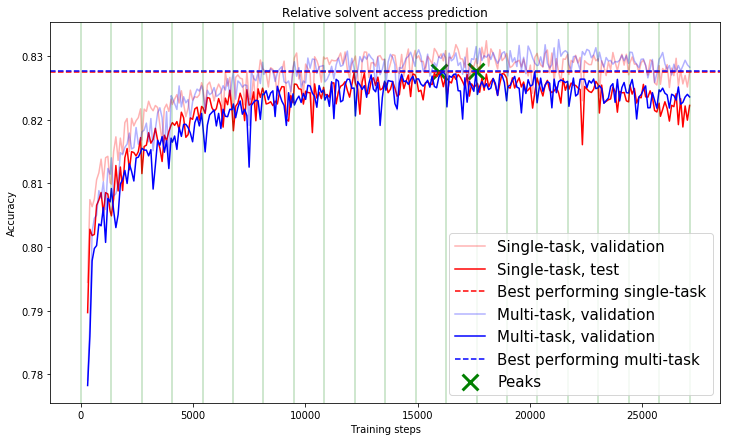

In [113]:
savefile = 0
filename = '../graphs/final/rel_final_small.png'
prefix = 'Kernel sizes: '

LW=2
plt.plot(steps_cum[3:], solv_rel_accs_v[3:], label='Single-task, validation', c='r', alpha=0.3)#, lw=LW)
plt.plot(steps_cum[3:], solv_rel_accs_t[3:], label='Single-task, test', c='r', alpha=1)#, lw=LW)
plt.axhline(y=rel_best_single_test, label='Best performing single-task', ls='--', c='r')
plt.plot(steps_cum[3:], rel_accs_v_multi[3:], label='Multi-task, validation', c='b', alpha=0.3)#, lw=LW)
plt.plot(steps_cum[3:], rel_accs_t_multi[3:], label='Multi-task, validation', c='b', alpha=1)#, lw=LW)
plt.axhline(y=rel_best_multi_test, label='Best performing multi-task', ls='--', c='b')
#plt.plot(steps_cum[3:], acc_structs4[3:], label=())#, lw=LW)
#plt.plot(steps_cum[3:], acc_structs6[3:], label=('%s %s' % (prefix, '')))#, lw=LW)
#plt.plot(steps_cum[3:], acc_structs7[3:], label=('%s %s' % (prefix, '')))#, lw=LW)

for i in epochs:
    plt.axvline(x=i, alpha=0.25, c='g')
    

plt.scatter(rel_peaksx, rel_peaksy, c='green', marker='x', s=250, lw=3, label='Peaks')


plt.title('Relative solvent access prediction')
plt.xlabel('Training steps')
plt.ylabel('Accuracy')
plt.legend(prop={'size': 15})
#plt.show()
if savefile:
    my_file = Path(filename)
    if my_file.is_file():
        print('Filen findes allerede')
    else:
        print('Gemmer som:', filename)
        plt.savefig(filename)

#plt.savefig('../graphs/new/kernel_size_variations_1.png')

In [97]:
singlevals_t = solv_abs_accs_t
multivals_t = abs_accs_t_multi

singlevals_v = solv_abs_accs_v
multivals_v = abs_accs_v_multi


abs_best_multi_test_index   = np.argmax(multivals_t)
abs_best_single_test_index  = np.argmax(singlevals_t)
abs_best_multi_test         = multivals_t[abs_best_multi_test_index]
abs_best_single_test        = singlevals_t[abs_best_single_test_index]
abs_best_multi_test_step    = steps_cum[abs_best_multi_test_index]
abs_best_single_test_step   = steps_cum[abs_best_single_test_index]
abs_best_multi_test_epoch   = int(abs_best_multi_test_step/1355)
abs_best_single_test_epoch  = int(abs_best_single_test_step/1355)

abs_best_multi_valid_index   = np.argmax(multivals_v)
abs_best_single_valid_index  = np.argmax(singlevals_v)
abs_best_multi_valid         = multivals_v[abs_best_multi_valid_index]
abs_best_single_valid        = singlevals_v[abs_best_single_valid_index]
abs_best_multi_valid_step    = steps_cum[abs_best_multi_valid_index]
abs_best_single_valid_step   = steps_cum[abs_best_single_valid_index]
abs_best_multi_valid_epoch   = int(abs_best_multi_valid_step/1355)
abs_best_single_valid_epoch  = int(abs_best_single_valid_step/1355)

abs_peaksx = [abs_best_multi_test_step, abs_best_single_test_step]
abs_peaksy = [abs_best_multi_test, abs_best_single_test]

print('\t\tSingle\t\t\tMulti\n(Epoch\tValid)\t(Epoch\tTest)\t(Epoch\tValid)\t(Epoch\tTest)')
print('(%d\t%.4f)\t(%d\t%.4f)\t(%d\t%.4f)\t(%d\t%.4f)' % (abs_best_single_valid_epoch, abs_best_single_valid, abs_best_single_test_epoch, abs_best_single_test, abs_best_multi_valid_epoch, abs_best_multi_valid, abs_best_multi_test_epoch, abs_best_multi_test))
#print('%d\t%.4f\t%.4f' % (int()))

		Single			Multi
(Epoch	Valid)	(Epoch	Test)	(Epoch	Valid)	(Epoch	Test)
(12	0.8167)	(11	0.8101)	(11	0.8164)	(10	0.8091)


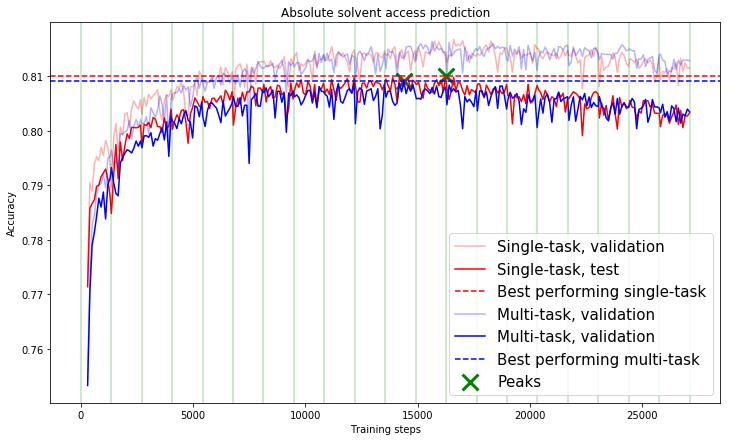

In [115]:
savefile = 0
filename = '../graphs/final/abs_final_small.png'
prefix = 'Kernel sizes: '

LW=2
plt.plot(steps_cum[3:], solv_abs_accs_v[3:], label='Single-task, validation', c='r', alpha=0.3)#, lw=LW)
plt.plot(steps_cum[3:], solv_abs_accs_t[3:], label='Single-task, test', c='r', alpha=1)#, lw=LW)
plt.axhline(y=abs_best_single_test, label='Best performing single-task', ls='--', c='r')
plt.plot(steps_cum[3:], abs_accs_v_multi[3:], label='Multi-task, validation', c='b', alpha=0.3)#, lw=LW)
plt.plot(steps_cum[3:], abs_accs_t_multi[3:], label='Multi-task, validation', c='b', alpha=1)#, lw=LW)
plt.axhline(y=abs_best_multi_test, label='Best performing multi-task', ls='--', c='b')
#plt.plot(steps_cum[3:], acc_structs4[3:], label=())#, lw=LW)
#plt.plot(steps_cum[3:], acc_structs6[3:], label=('%s %s' % (prefix, '')))#, lw=LW)
#plt.plot(steps_cum[3:], acc_structs7[3:], label=('%s %s' % (prefix, '')))#, lw=LW)

for i in epochs:
    plt.axvline(x=i, alpha=0.25, c='g')
    

plt.scatter(abs_peaksx, abs_peaksy, c='green', marker='x', s=250, lw=3, label='Peaks')


plt.title('Absolute solvent access prediction')
plt.xlabel('Training steps')
plt.ylabel('Accuracy')
plt.legend(prop={'size': 15})
#plt.show()
if savefile:
    my_file = Path(filename)
    if my_file.is_file():
        print('Filen findes allerede')
    else:
        print('Gemmer som:', filename)
        plt.savefig(filename)

#plt.savefig('../graphs/new/kernel_size_variations_1.png')